## Hand Sign Prediction using CNN

### Import

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

### Data Loading

In [40]:
train_df = pd.read_csv("/Users/anupamg/Library/CloudStorage/OneDrive-Personal/Documents/ML IO/Data Sets/Sign Language MNIST/sign_mnist_train.csv")
test_df = pd.read_csv("/Users/anupamg/Library/CloudStorage/OneDrive-Personal/Documents/ML IO/Data Sets/Sign Language MNIST/sign_mnist_test.csv")

In [41]:
test = pd.read_csv("/Users/anupamg/Library/CloudStorage/OneDrive-Personal/Documents/ML IO/Data Sets/Sign Language MNIST/sign_mnist_test.csv")
y = test['label']

In [42]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [43]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [44]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [45]:
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [46]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [47]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

We just converted values in y_train and y_test to binary values.

In [48]:
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [49]:
x_train = train_df.values
x_test = test_df.values

In [50]:
print(x_train)

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


### Pre Processing Data

In [58]:
x_train = x_train / 255
x_test = x_test / 255

Pixel values range from 0 to 255. So dividing by 255 we get all the values to be between 0 and 1.

In [52]:
print(x_train)

[[0.41960784 0.4627451  0.49803922 ... 0.8        0.79607843 0.79215686]
 [0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 ...
 [0.68235294 0.68235294 0.68235294 ... 0.79215686 0.78431373 0.78431373]
 [0.69411765 0.70980392 0.72156863 ... 0.25098039 0.34117647 0.36470588]
 [0.70196078 0.70588235 0.70588235 ... 0.80392157 0.81960784 0.84313725]]


In [53]:
# Reshaping the data from 1-D to 3-D as required through input by CNN
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

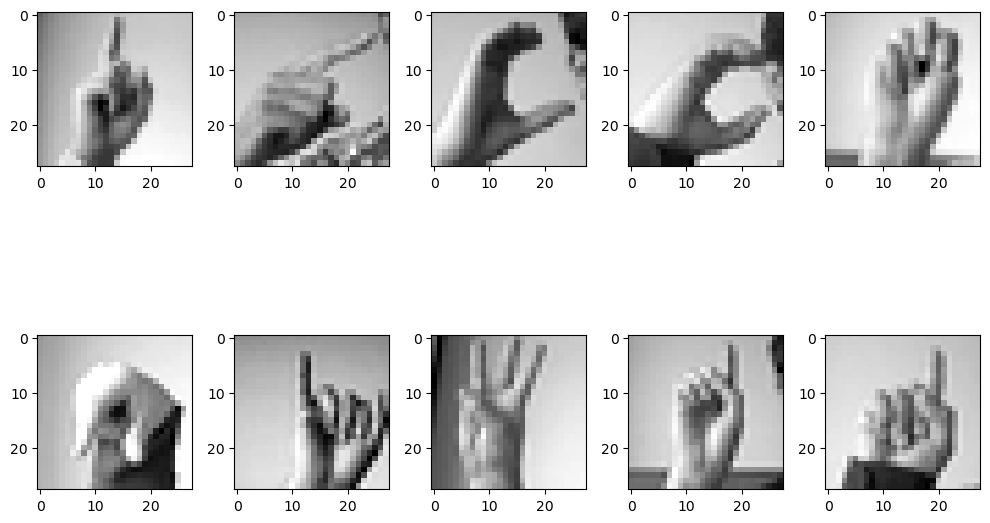

In [54]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [55]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2)) # Dropout randomly deletes subsets of neurons to prevent from overfitting
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten()) # Converts multi dimensional Array into 1 dimensional array(vectors)
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [56]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/10
858/858 [==============================] - 37s 42ms/step - loss: 0.8522 - accuracy: 0.7355 - val_loss: 0.2707 - val_accuracy: 0.9182
Epoch 2/10
858/858 [==============================] - 37s 43ms/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.1721 - val_accuracy: 0.9460
Epoch 3/10
858/858 [==============================] - 33s 38ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.1434 - val_accuracy: 0.9575
Epoch 4/10
858/858 [==============================] - 39s 46ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.1974 - val_accuracy: 0.9380
Epoch 5/10
858/858 [==============================] - 39s 46ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.2231 - val_accuracy: 0.9453
Epoch 6/10
858/858 [==============================] - 35s 40ms/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.1914 - val_accuracy: 0.9455
Epoch 7/10
858/858 [==============================] - 33s 39ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.1385 - val_accuracy:

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23501235246658325
Test accuracy: 0.9346067905426025
